In [21]:
import numpy as np
from matplotlib import pyplot as plt
from MLP import MultiLayerPerceptronBig
from utils import calculate_accuracy, calculate_mse, calculate_mae


## Train the MLP to recognise letters from the UCI letter recognition dataset with 16 parameters
https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data

In [22]:
data = []

# Load the data, first column is a letter, the rest are parameters
with open('letter-recognition.txt', 'r') as file:
    for line in file:
        line = line.strip().split(',')  # Split each line by comma
        label = ord(line[0]) - ord('A')  # Convert the first letter to an integer
        values = list(map(int, line[1:]))  # Convert the rest to integers
        data.append((label, values))  # Store the label and values as a tuple

# split the data into training and test sets
X_train = np.array([x[1] for x in data[:16000]])
y_train = np.array([x[0] for x in data[:16000]])

X_test = np.array([x[1] for x in data[16000:]])
y_test = np.array([x[0] for x in data[16000:]])

# since there are 26 classes, we need 26 output units, the train set has only one value which is the letter.
# we need to convert the letter to a vector of 26 values, where the index of the letter is 1 and the rest are 0
y_train = np.eye(26)[y_train]
y_test = np.eye(26)[y_test]

print(data[0])
print(y_test[0])


(19, [2, 8, 3, 5, 1, 8, 13, 0, 6, 6, 10, 8, 0, 8, 0, 8])
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]


### now to find a good combination of learning rate and hidden unit size

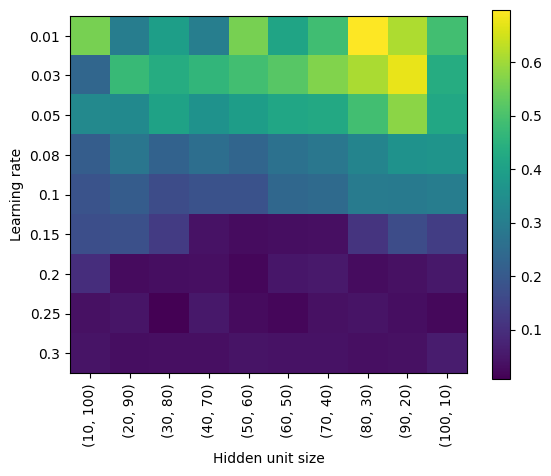

<Figure size 640x480 with 0 Axes>

In [4]:

hidden_unit_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
alpha_values = [0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.3]

total_accuracy = np.zeros((len(alpha_values), len(hidden_unit_sizes)))

def train_and_eval(alpha, h1_size, h2_size):
    # Create the MLP
    network = MultiLayerPerceptronBig(16, h1_size, h2_size, 26)

    # Train the MLP
    for epoch in range(20):
        for value, target in zip(X_train, y_train):
            network.train(value, target, alpha)

    # Calculate accuracy on test set
    return calculate_accuracy(np.argmax(network.forward(X_test), axis=1), np.argmax(y_test, axis=1))

for i, learning_rate in enumerate(alpha_values):
    for j, hidden_unit_size in enumerate(hidden_unit_sizes):
        total_accuracy[i, j] = train_and_eval(learning_rate, hidden_unit_sizes[j], hidden_unit_sizes[j*-1 - 1])

# plot heat map
plt.imshow(total_accuracy, cmap='viridis')
plt.xticks(np.arange(len(hidden_unit_sizes)), zip(hidden_unit_sizes, hidden_unit_sizes[::-1]), rotation='vertical')
plt.xlabel('Hidden unit size')
plt.yticks(np.arange(len(alpha_values)), alpha_values)
plt.ylabel('Learning rate')
plt.colorbar()
plt.show()
location = "figures/mlp_letters_alpha_units"
plt.savefig(f"{location}.png")

### we shall use a learning rate of 0.01 and hidden layers of size 80 and 30

accuracy on training set:
0.823875

accuracy on test set:
0.798


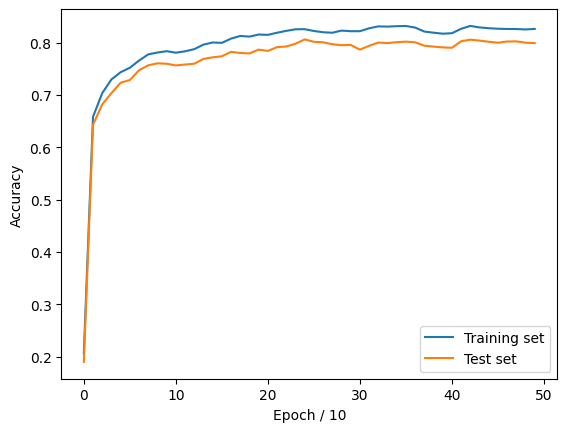

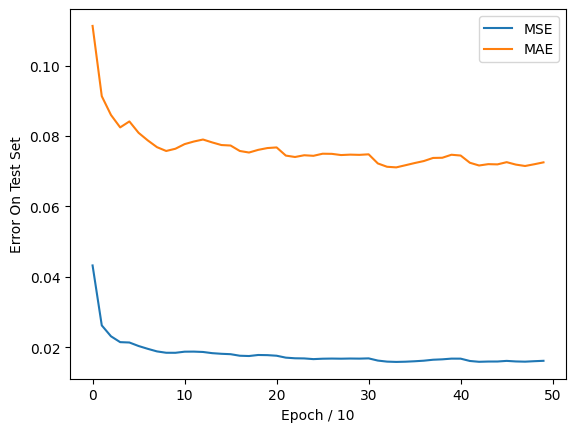

In [20]:

mlp = MultiLayerPerceptronBig(16, 80, 30, 26, activation='tanh')

accuracy_list = []
error_list = []

alpha = 0.01
for epoch in range(500):
    for value, target in zip(X_train, y_train):
        mlp.train(value, target, alpha)

    # Calculate accuracy on test set and training set every 100 epochs
    if epoch % 10 == 0:
        pred_y_train = np.argmax(mlp.forward(X_train), axis=1)
        train_accuracy = calculate_accuracy(pred_y_train, np.argmax(y_train, axis=1))
        pred_y_test = np.argmax(mlp.forward(X_test), axis=1)
        test_accuracy = calculate_accuracy(pred_y_test, np.argmax(y_test, axis=1))

        accuracy_list.append((train_accuracy, test_accuracy))

        mse = calculate_mse(mlp.forward(X_test), y_test)
        mae = calculate_mae(mlp.forward(X_test), y_test)
        error_list.append((mse, mae))

        if epoch % 100 == 0:
            #print(f"Epoch {epoch} accuracy: {test_accuracy}")
            alpha = alpha * 0.9


# print error
print("accuracy on training set:")
pred_y_train = np.argmax(mlp.forward(X_train), axis=1)
print(calculate_accuracy(pred_y_train, np.argmax(y_train, axis=1)))
# print_results(mlp.forward(X_train), y_train)

print("\naccuracy on test set:")
pred_y_test = np.argmax(mlp.forward(X_test), axis=1)
print(calculate_accuracy(pred_y_test, np.argmax(y_test, axis=1)))
# print_results(mlp.forward(X_test), y_test)

# plot accuracy over time
plt.plot(accuracy_list)
plt.xlabel('Epoch / 10')
plt.ylabel('Accuracy')
plt.legend(['Training set', 'Test set'])
plt.show()

# plot error over time
plt.plot(error_list)
plt.xlabel('Epoch / 10')
plt.ylabel('Error On Test Set')
plt.legend(['MSE', 'MAE'])
plt.show()